# Joint data analysis

This will be the notebook in which I will conduct my joint data analysis.
The idea is that I can use my JOD data as well as my quantitative data from the cluster in order to formulate some joint statements about my model performance.

In [2]:
import pandas as pd

df_jod = pd.read_excel("data/jod.xlsx")
df_metrics = pd.read_excel("data/singleMetricResultClean.xlsx")

### Reflection

So given my JOD values, what kind of correlation could I even compute?

For each facet of my data I can create scatterplot where one observation is a method.

                      jod
default          4.454487
mcmc            19.246059
mini_splatting  -5.515196
eagles          -2.305107
mip_splatting  -18.020907
gaussian_pro    -9.873723
geo_gaussian    12.014387
                      jod     psnr
default          4.454487  28.8986
mcmc            19.246059  29.0389
mini_splatting  -5.515196  29.6086
eagles          -2.305107  29.2611
mip_splatting  -18.020907  28.9718
gaussian_pro    -9.873723  29.3104
geo_gaussian    12.014387  28.1784
                      jod
default         -9.411679
mcmc            17.422565
mini_splatting -10.399739
eagles           3.942883
mip_splatting    10.54557
gaussian_pro    -9.471648
geo_gaussian     -2.62798
                      jod     psnr
default         -9.411679  28.8986
mcmc            17.422565  29.0389
mini_splatting -10.399739  29.6086
eagles           3.942883  29.2611
mip_splatting    10.54557  28.9718
gaussian_pro    -9.471648  29.3104
geo_gaussian     -2.62798  28.1784
                      jo

IndexError: index 3 is out of bounds for axis 0 with size 3

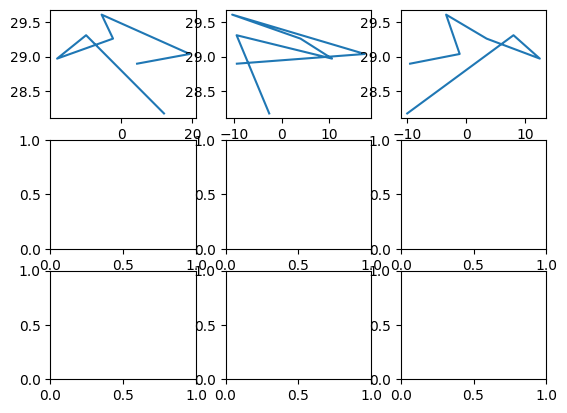

In [54]:
from matplotlib import pyplot as plt


def plot_quality_metric_against_jod(quality_metric: str = "psnr") -> None:
    fig, axs = plt.subplots(3, 3)

    for i, dataset in enumerate(df_metrics["dataset"].unique()):
        for j, size in enumerate(df_metrics["size"].unique()):
            single_facet_df = (
                df_jod[(df_jod["dataset"] == dataset) & (df_jod["size"] == size)]
                .transpose()
                .iloc[3:]
                .rename(lambda x: "jod", axis=1)
            )
            metric_single_facet = (
                df_metrics[
                    (df_metrics["dataset"] == "room") & (df_metrics["size"] == "low")
                ]
                .groupby(["model", "dataset", "size"])[quality_metric]
                .median()
            )
            metrics_df = pd.DataFrame.from_dict(
                {
                    "technique": [
                        technique.replace("-", "_") for technique, _, _ in metric_single_facet.index
                    ],
                    quality_metric: metric_single_facet.values,
                }
            ).set_index("technique")
            single_facet_df = single_facet_df.join(metrics_df)

            axs[i][j].plot(single_facet_df["jod"], single_facet_df[quality_metric])
    
    plt.show()

plot_quality_metric_against_jod()

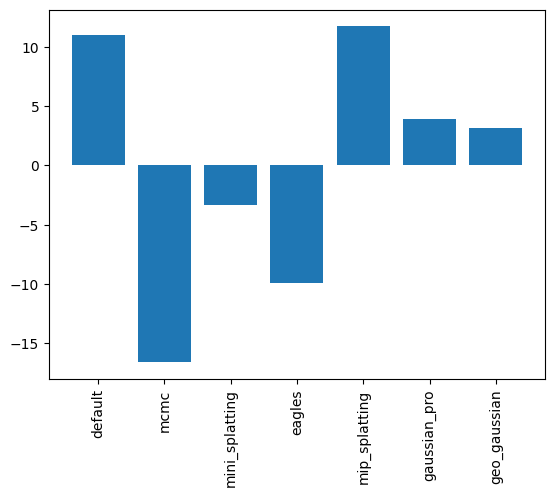

In [17]:
from matplotlib import pyplot as plt

single_facet_df = df_jod[(df_jod["dataset"] == "room") & (df_jod["size"] == "low")].transpose().iloc[3:]

plt.bar(single_facet_df.index, single_facet_df[0])
plt.xticks(rotation=90)
plt.show()


In [25]:
psnr_single_facet = df_metrics[(df_metrics["dataset"] == "room") & (df_metrics["size"] == "low")].groupby(["model", "dataset", "size"])["psnr"].median()

In [26]:
psnr_single_facet

model           dataset  size
default         room     low     28.8986
eagles          room     low     29.2611
gaussian-pro    room     low     29.3104
geo-gaussian    room     low     28.1784
mcmc            room     low     29.0389
mini-splatting  room     low     29.6086
mip-splatting   room     low     28.9718
Name: psnr, dtype: float64

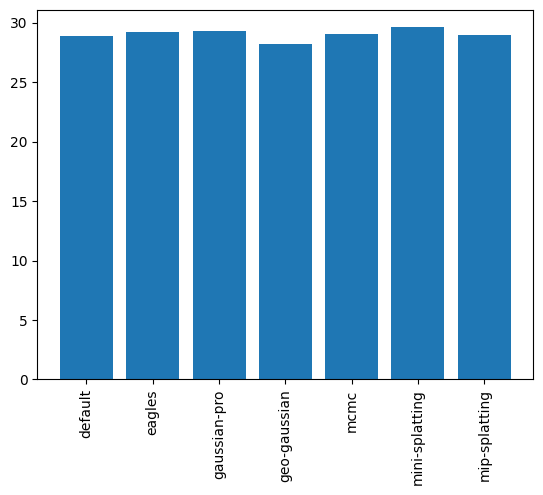

In [35]:
plt.bar([technique for technique, _ , _ in psnr_single_facet.index], psnr_single_facet.values)
plt.xticks(rotation=90)
plt.show()